In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df = pd.read_csv("../DATA/hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [5]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

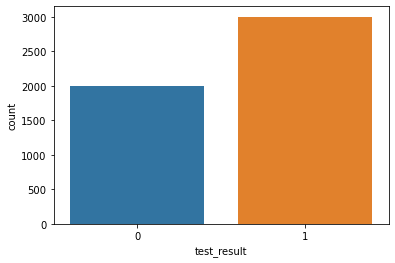

In [7]:
sns.countplot(x='test_result', data=df)

<AxesSubplot:xlabel='test_result', ylabel='age'>

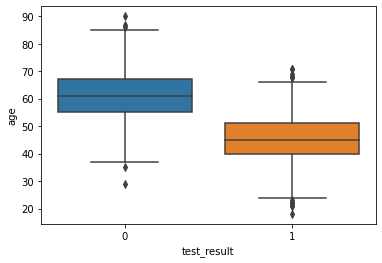

In [8]:
sns.boxplot(x='test_result', y='age', data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

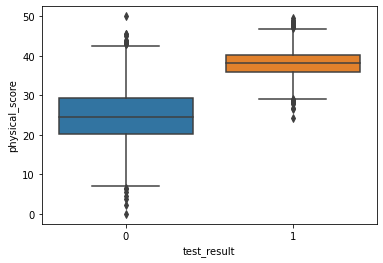

In [9]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

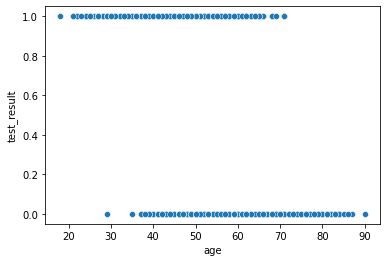

In [10]:
sns.scatterplot(x='age', y='test_result', data=df)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

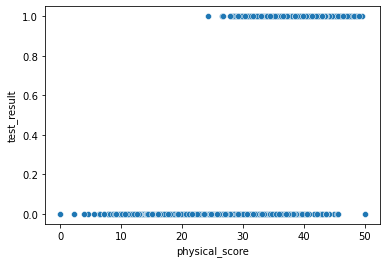

In [11]:
sns.scatterplot(x='physical_score', y='test_result', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

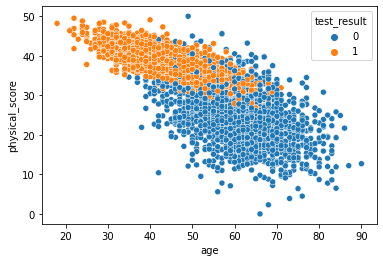

In [12]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result')

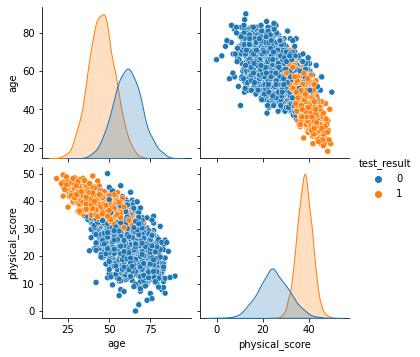

In [13]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

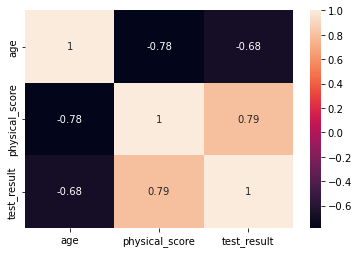

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
X= df.drop('test_result', axis=1)
y = df['test_result']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train.shape

(3350, 2)

In [19]:
X_test.shape

(1650, 2)

In [20]:
y_train.shape

(3350,)

In [21]:
y_test.shape

(1650,)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X_train = scaler.fit_transform(X_train)

In [25]:
scaled_X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
Log_model = LogisticRegression()

In [28]:
Log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [29]:
pred = Log_model.predict(scaled_X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [31]:
print(confusion_matrix(y_test, pred))

[[573  90]
 [ 61 926]]


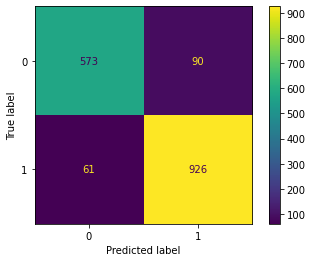

In [32]:
plot_confusion_matrix(Log_model, scaled_X_test, y_test)

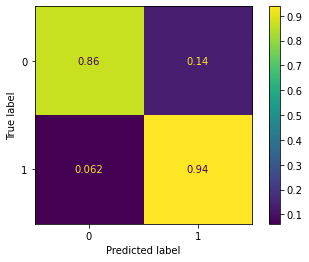

In [33]:
plot_confusion_matrix(Log_model, scaled_X_test, y_test, normalize='true')

In [34]:
 from sklearn.metrics import classification_report, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       663
           1       0.91      0.94      0.92       987

    accuracy                           0.91      1650
   macro avg       0.91      0.90      0.90      1650
weighted avg       0.91      0.91      0.91      1650



In [36]:
precision_recall_curve(y_test, pred)

(array([0.59818182, 0.91141732, 1.        ]),
 array([1.        , 0.93819656, 0.        ]),
 array([0, 1], dtype=int64))

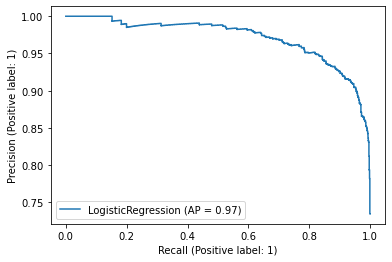

In [37]:
plot_precision_recall_curve(Log_model,scaled_X_test, y_test)

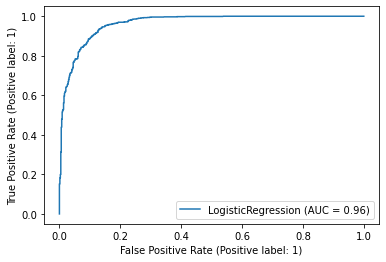

In [38]:
plot_roc_curve(Log_model, scaled_X_test, y_test)